# Problema de Green para el anillo en la esfera
En este notebook vemos qué valores toma el potencial generado por un anillo de radio d con carga total Q, en el interior de una esfera conductora de radio b y con las paredes a tierra. Para generar el potencial a partir de la solución en forma de serie usamos loops en Python (https://wiki.python.org/moin/ForLoop) junto con NumPy, SciPy para funciones especiales, y Matplotlib para graficar los resultados. Recuerden que cada celda debe ejecutarse en orden apretando SHIFT+ENTER:

In [1]:
# Importamos NumPy, Matplotlib, y las funciones especiales de SciPy
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *

In [2]:
# Definimos las variables relevantes del problema (en unidades adimensionales)
Q = 1.     # carga total en el anillo uniformemente cargado
b = 1.     # radio de la esfera
d = .5*b   # radio del anillo (debe ser menor que b)
n_max = 50 # número de términos a considerar en la suma

In [3]:
# Definimos una función que devuelva el valor del potencial en un punto. Usamos un bucle para hacer la suma:
def psi(r,t):
    out = 0.                      # inicializamos la variable out a cero
    for n in range(0,n_max+1):    # sumamos sobre todos los términos hasta n_max
        rmin = np.minimum(r,d)
        rmax = np.maximum(r,d)
        out = out + Q*(-1)**n*factorial2(2*n-1)/(2**n*factorial(n))*lpmv(0,2*n,np.cos(t))*rmin**(2*n)*(1/rmax**(2*n+1)-rmax**(2*n)/b**(4*n+1))
    return out

Ahora graficamos el potencial en función de r para diferentes valores de theta:

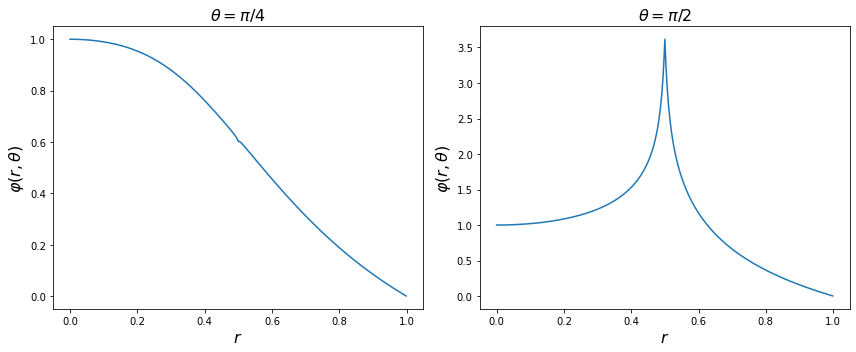

In [4]:
# Graficamos cortes del potencial en función de r para diferentes valores de theta:
r = np.arange(0,b,.001)   # generamos un vector con r entre 0 y b, con paso de 0.001

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
theta = np.pi/4
plt.plot(r,psi(r,theta))
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$\varphi(r,\theta)$',fontsize=16)
plt.title(r'$\theta = \pi/4$',fontsize=16)
plt.tight_layout()
plt.subplot(1, 2, 2)
theta = np.pi/2
plt.plot(r,psi(r,theta))
plt.xlabel(r'$r$',fontsize=16)
plt.ylabel(r'$\varphi(r,\theta)$',fontsize=16)
plt.title(r'$\theta = \pi/2$',fontsize=16)
plt.tight_layout()
plt.show()

Finalmente, graficamos cortes con el valor del potencial en el plano (r,theta) en coordenadas polares. Para eso tenemos que generar una malla 2D con los valores de los pares de coordenadas usando el comando "meshgrid", a partir de vectores que tengan los valores lineales de r y theta:

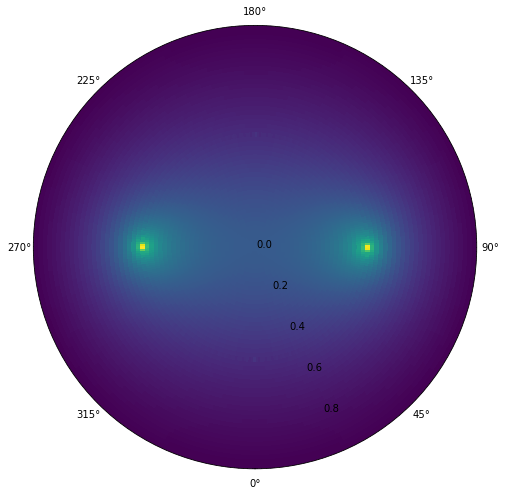

In [5]:
# Miramos todo el plano (r,theta); generamos vectores con los valores de r y theta, y la malla 2D:
r     = np.arange(0,b,.02)
theta = np.arange(0,2*np.pi,.02)
tmesh,rmesh = np.meshgrid(theta,r)

fig = plt.figure(figsize=(7,7))
ax  = fig.add_subplot(111,polar='True')
ax.set_theta_offset(-np.pi/2)
plt.pcolormesh(tmesh,rmesh,psi(rmesh,tmesh),shading='auto')
plt.tight_layout()
plt.show()